# Analisis

In [48]:
import numpy as np
from sklearn import linear_model
from matplotlib import pyplot as plt

In [49]:
%run codigos/mv_to_ep.ipynb
%run codigos/R_Fresnel.ipynb

In [50]:
#-----------------------------------
## Parámetros globales de la antena
#-----------------------------------

Fs = 23.328e9 #Frecuencia de muestreo [Hz] 
Ts = 1/Fs
BW = 1.5e9 
corte = 150
Nfft= 1024 # nro de frecs -> conviene que sea multiplo de 2 para calcular la FFT de manera eficiente. 
#Tiene que ser mayor a la longitud de la señal (285 para 2m, 439 para 3m)

#------------------------------
#Elegir frecuencia portadora
#------------------------------
portadora = input('portadora? (Fc7 o Fc8)')

if portadora == 'Fc7':
    fc = 7.290e9 
    Fc = '7.29GHz'
elif portadora == 'Fc8':
    fc = 8.748e9
    Fc = '8.74GHz'
else:
    print('Error: portadora debe ser Fc7 o Fc8')

## Importo señales medidas Xethru

In [51]:
import pickle
if portadora == 'Fc8':
    with open('mayo_Fc8.pkl','rb') as g1:
        Mayo8 = pickle.load(g1)
    with open('junio_Fc8.pkl','rb') as g2:
        Junio8 = pickle.load(g2)
    with open('julio_Fc8.pkl','rb') as g3:
        Julio8 = pickle.load(g3)
    with open('agosto_Fc8.pkl','rb') as g4:
        Agosto8 = pickle.load(g4)

    print(Mayo8.keys())
    print(Junio8.keys())
    print(Julio8.keys())
    print(Agosto8.keys())
else:
    with open('mayo_Fc7.pkl','rb') as g1:
        Mayo7 = pickle.load(g1)
    with open('junio_Fc7.pkl','rb') as g2:
        Junio7 = pickle.load(g2)
    with open('julio_Fc7.pkl','rb') as g3:
        Julio7 = pickle.load(g3)
    with open('agosto_Fc7.pkl','rb') as g4:
        Agosto7 = pickle.load(g4)
    print(Mayo7.keys())
    print(Junio7.keys())
    print(Julio7.keys())
    print(Agosto7.keys())

dict_keys(['h1_may', 'h2_may', 'f_may', 'S1_may', 'S2_may'])
dict_keys(['h1_jun', 'h2_jun', 'f_jun', 'S1_jun', 'S2_jun', 'hz_jun', 'Z2_jun', 'tita_jun'])
dict_keys(['h1_jul', 'h2_jul', 'f_jul', 'S1_jul', 'S2_jul', 'hz_jul', 'Z2_jul', 'tita_jul'])
dict_keys(['h_ag', 'f_ag', 'S1A_ag', 'S1B_ag', 'S2_ag', 'M2_ag', 'hz_ag', 'Z2_ag', 'MZ2_ag', 'tita_ag'])


# Frecuencia 8.74GHz

In [52]:
#chequeo que las frecuencias sean iguales
# fm = Mayo8.get('f_may')
# fjn = Junio8.get('f_jun')
# fjl = Julio8.get('f_jul')
# fa = Agosto8.get('f_ag')

# L = [fm,fjn,fjl,fa]
# out = (np.diff(np.vstack(L).reshape(len(L),-1),axis=0)==0).all()
# print('todas las frecuencias son siempre iguales?',out)

# if out:
#     f = fm
#     print('renombro las frecuencias como f')
# else:
#     print('diferentes')

f = Mayo8.get('f_may')

## Importo señales Hydra

In [53]:
with open('codigos/hydra_may.pkl','rb') as g5:
        hydra_may = pickle.load(g5)
with open('codigos/hydra_jun.pkl','rb') as g6:
        hydra_jun = pickle.load(g6)
with open('codigos/hydra_jul.pkl','rb') as g7:
        hydra_jul = pickle.load(g7)
with open('codigos/hydra_ag.pkl','rb') as g8:
        hydra_ag = pickle.load(g8)


## Llamo variables

In [54]:
h1_may = Mayo8.get('h1_may')
S1_may = Mayo8.get('S1_may')
S2_may = Mayo8.get('S2_may')
#---------------------------
h1_jun = Junio8.get('h1_jun')
S1_jun = Junio8.get('S1_jun')
S2_jun = Junio8.get('S2_jun')
#---------------------------
h1_jul = Julio8.get('h1_jul')
S1_jul = Julio8.get('S1_jul')
S2_jul = Julio8.get('S2_jul')
#---------------------------
h_ag = Agosto8.get('h_ag')
S1A_ag = Agosto8.get('S1A_ag')
S1B_ag = Agosto8.get('S1B_ag')
S2_ag = Agosto8.get('S2_ag')
M2_ag = Agosto8.get('M2_ag')

print(h_ag)
print(np.shape(S2_ag))
print(np.shape(M2_ag))

[0.355 0.435]
(2, 153)
(2, 153)


## 


# Valores para el modelo de suelo

In [55]:
# Busco el min y max de entre todas las mediciones de hmedad de todas las fechas
mv_min_med = np.min([np.min(hydra_may.get('mv_med_may')), np.min(hydra_jun.get('mv_med_jun')), np.min(hydra_jul.get('mv_med_jul')), np.min(hydra_ag.get('mv_med_ag'))])
mv_max_med = np.max([np.max(hydra_may.get('mv_med_may')), np.max(hydra_jun.get('mv_med_jun')), np.max(hydra_jul.get('mv_med_jul')), np.max(hydra_ag.get('mv_med_ag'))])
print('mv min = ',mv_min_med,'mv max = ',mv_max_med)

ep_min_re_med = np.min([np.min(np.real(hydra_may.get('ep_med_may'))), np.min(np.real(hydra_jun.get('ep_med_jun'))), np.min(np.real(hydra_jul.get('ep_med_jul'))), np.min(np.real(hydra_ag.get('ep_med_ag')))])
ep_max_re_med = np.max([np.max(np.real(hydra_may.get('ep_med_may'))), np.max(np.real(hydra_jun.get('ep_med_jun'))), np.max(np.real(hydra_jul.get('ep_med_jul'))), np.max(np.real(hydra_ag.get('ep_med_ag')))])
ep_min_im_med = np.min([np.min(np.imag(hydra_may.get('ep_med_may'))), np.min(np.imag(hydra_jun.get('ep_med_jun'))), np.min(np.imag(hydra_jul.get('ep_med_jul'))), np.min(np.imag(hydra_ag.get('ep_med_ag')))])
ep_max_im_med = np.max([np.max(np.imag(hydra_may.get('ep_med_may'))), np.max(np.imag(hydra_jun.get('ep_med_jun'))), np.max(np.imag(hydra_jul.get('ep_med_jul'))), np.max(np.imag(hydra_ag.get('ep_med_ag')))])
print('epsilon reales: min = ',ep_min_re_med,' max = ',ep_max_re_med)
print('epsilon complejos: min = ',ep_min_im_med,' max = ',ep_max_im_med)

mv min =  0.0 mv max =  0.376
epsilon reales: min =  1.584  max =  25.813
epsilon complejos: min =  0.05  max =  25.44


In [56]:
#grilla de valores para MV
mv_min, mv_max, n_mv = 0, 0.5, 100
MV = np.linspace(mv_min,mv_max,n_mv)

Sand = 0.2
Clay = 0.8

ep_teo = mv_to_ep(MV,Sand,Clay,0)['ep']

#usando el error
#ep_std = 0.01 #std para estimar el error en ep del modelo teórico
#ep_teo = mv_to_ep(MV,Sand,Clay,ep_std)['ep']
#ep_error = mod.mv_to_ep(MV,Sand, Clay,ep_std)['ep_error']

ep_min, ep_max = np.min(ep_teo), np.max(ep_teo)
print('ep min:', ep_min)
print('ep max:', ep_max)
print(np.shape(ep_teo))

ep min: (2.0118-0.198j)
ep max: (24.8074+5.5584j)
(100,)


## medio semi-infinito

In [57]:

ind = []
for i in range(len(h1_may)):
    aux = np.zeros(n_mv,dtype=float)
    for j in range(n_mv):
        ep = ep_teo[j]
    
        #coef de reflexion depende solo de ep
        R = R_1capa(ep)
        S2teo_may = S1_may[i]*R
        error = np.sum(np.abs(np.abs(S2teo_may)-np.abs(S1_may)))/np.shape(S1_may)[1]
        ##error
        aux[j] = error  
    ind.append(np.argmin(aux))
# ind = np.asarray(ind).T
# print(np.shape(ind))
print(ind)
type(ind)


[66, 99, 99, 99]


list

In [58]:
#LE FALTA PERFECCIONAMIENTO --> FUNCION EN R_FRESNEL
# for i in range(len(h1_may)):
#     ind_i = ind[i]
#     if ind_i < 9999:
#         print(ind_i)
#         mv_op = MV[ind[i]]
#         ep_op = ep_teo[ind[i]]
#         S_op = S1_may*R_1capa(ep_op)
#         error_mae = e_mae[i,ind[i]]

#         plt.plot(f,np.abs(S_op[i]), label='teo')
#         plt.plot(f,np.abs(S2_may[i]), label='med')
#         plt.legend()
#     else:
#         print('error')

    
# print(np.shape(S_op))

16


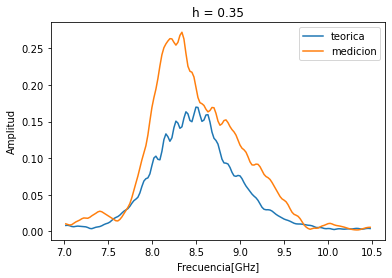

24


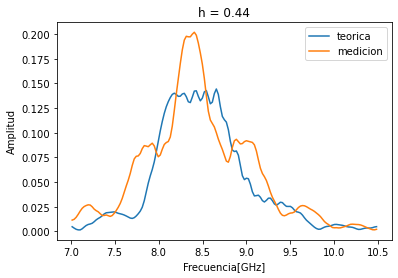

80


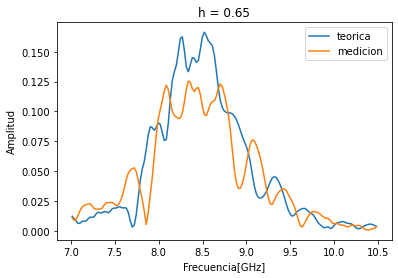

99


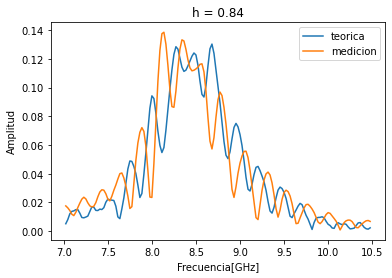

(2,)


c:\Users\Coraline\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


In [59]:
S2_teo_jun = S_teo_A(h1_jun, f, S1_jun, S2_jun, ep_teo, n_mv)
print(np.shape(S2_teo_jun))

## Modelo 2 capas

In [60]:
n_ep = 40
ep1Range = np.linspace(ep_min,0.2*ep_max,n_ep)
ep2Range = np.linspace(1.15*ep_min,2*ep_max,n_ep)

print('ep1:',ep1Range[0],ep1Range[-1])
print('ep2:',ep2Range[0],ep2Range[-1])

# espesor de la primera capa
d_min, d_max, n_d = 0, 0.08, 40
dRange = np.linspace(d_min,d_max,n_d)

print('d:',np.min(dRange),np.max(dRange))

ep1: (2.0118-0.198j) (4.961480000000001+1.11168j)
ep2: (2.31357-0.22769999999999999j) (49.6148+11.1168j)
d: 0.0 0.08


### Agosto

In [61]:
print(np.shape(S1A_ag), np.shape(S1B_ag))

(2, 153) (2, 153)


altura: h =  0.355
indices optimos para chapa azul: (39, 0, 0)
indices optimos para azul + conductora: (39, 0, 0)
(153,)
(153,)


<Figure size 432x288 with 0 Axes>

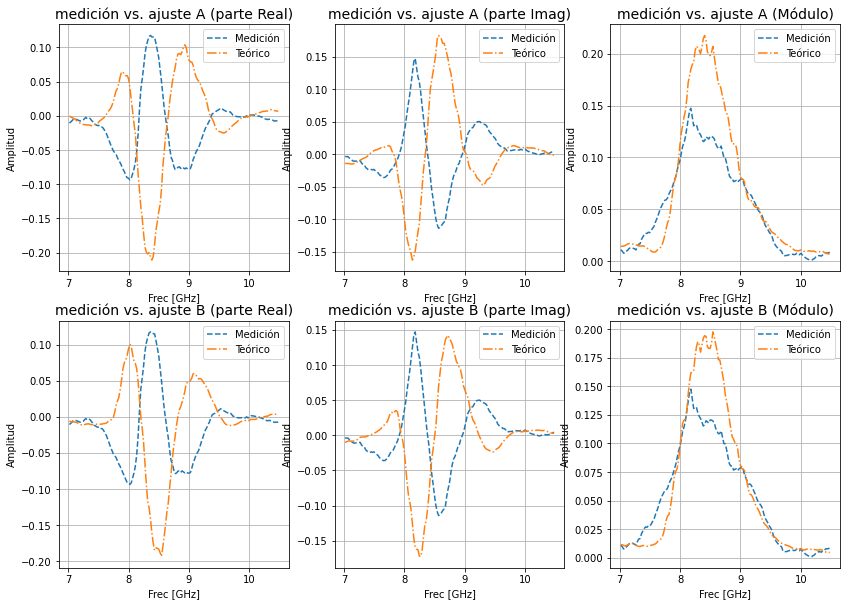

altura: h =  0.435
indices optimos para chapa azul: (39, 0, 0)
indices optimos para azul + conductora: (39, 0, 0)
(153,)
(153,)


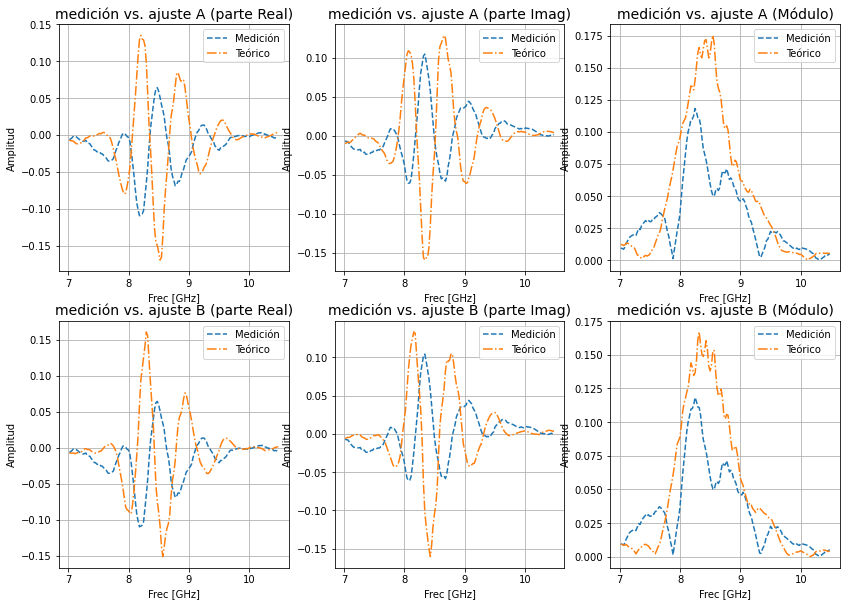

In [78]:
# vector para guardar el error para (EP1,EP2) usado en el ajuste
Err_A = np.zeros((n_d,n_ep,n_ep),dtype=float)
Err_B = np.zeros((n_d,n_ep,n_ep),dtype=float)

# vector en donde guardo la señal teórica que mejor ajusta a cada medición
DA_opt = np.zeros(len(h_ag), dtype=float)
EP1A_opt = np.zeros(len(h_ag), dtype=complex)
EP2A_opt = np.zeros(len(h_ag), dtype=complex)
DB_opt = np.zeros(len(h_ag), dtype=float)
EP1B_opt = np.zeros(len(h_ag), dtype=complex)
EP2B_opt = np.zeros(len(h_ag), dtype=complex)

# S_optima = np.zeros((len(h_ag),int(np.shape(S1A_ag)[1])), dtype=complex)
# print(np.shape(S_optima))

plt.figure()
for j in range(len(h_ag)):
    for i0 in range(n_d):
        D = dRange[i0]
        for i1 in range(n_ep):
            EP1 = ep1Range[i1]
            for i2 in range(n_ep):
                EP2 = ep2Range[i2]

                # coef de reflexión con EP1, EP2, D
                R = R_ep1_ep2(EP1,EP2,D,f)
                S2A_teo = S1A_ag[j]*R 
                S2B_teo = S1B_ag[j]*R
                ## Calculo métricas de error #
                Err_A[i0,i1,i2] = np.sum(np.abs(np.abs(S2A_teo)-np.abs(S2_ag[j])))/len(S2A_teo)
                Err_B[i0,i1,i2] = np.sum(np.abs(np.abs(S2B_teo)-np.abs(S2_ag[j])))/len(S2B_teo)

    print('altura: h = ',h_ag[j])
    print('indices optimos para chapa azul:', np.unravel_index(Err_A.argmin(),Err_A.shape))
    print('indices optimos para azul + conductora:', np.unravel_index(Err_B.argmin(),Err_B.shape))
    
    indice_da_opt = np.unravel_index(Err_A.argmin(),Err_A.shape)[0]
    DA_opt[j] = dRange[indice_da_opt]
    indice_db_opt = np.unravel_index(Err_B.argmin(),Err_B.shape)[0]
    DB_opt[j] = dRange[indice_db_opt]

    indice_ep1a_opt = np.unravel_index(Err_A.argmin(),Err_A.shape)[1]
    EP1A_opt[j] = ep1Range[indice_ep1a_opt]
    indice_ep1b_opt = np.unravel_index(Err_B.argmin(),Err_B.shape)[1]
    EP1B_opt[j] = ep1Range[indice_ep1b_opt]

    indice_ep2a_opt = np.unravel_index(Err_A.argmin(),Err_A.shape)[2]
    EP2A_opt[j] = ep2Range[indice_ep2a_opt]
    indice_ep2b_opt = np.unravel_index(Err_B.argmin(),Err_B.shape)[2]
    EP2B_opt[j] = ep2Range[indice_ep2b_opt]

    # Señal optima:
    RA_opt = R_ep1_ep2(EP1A_opt[j],EP2A_opt[j],DA_opt[j],f) 
    S2A_opt = S1A_ag[j,:]*RA_opt
    print(np.shape(S2A_opt))
    RB_opt = R_ep1_ep2(EP1B_opt[j],EP2B_opt[j],DB_opt[j],f) 
    S2B_opt = S1B_ag[j,:]*RB_opt
    print(np.shape(S2B_opt))

    fig , ax = plt.subplots(nrows=2, ncols=3, figsize=(14,10))

    ax[0,0].plot(f,np.real(S2_ag[j,:]),'--',label='Medición')
    ax[0,0].plot(f,np.real(S2A_opt),'-.',label='Teórico')
    ax[0,0].grid('on')
    ax[0,0].legend(loc="best",fontsize=10)
    ax[0,0].set_xlabel('Frec [GHz]')
    ax[0,0].set_ylabel('Amplitud')
    ax[0,0].set_title( 'medición vs. ajuste A (parte Real)', fontsize=14) #, fontstyle='normal')

    ax[0,1].plot(f,np.imag(S2_ag[j,:]),'--',label='Medición')
    ax[0,1].plot(f,np.imag(S2A_opt),'-.',label='Teórico')
    ax[0,1].grid('on')
    ax[0,1].legend(loc="best",fontsize=10)
    ax[0,1].set_xlabel('Frec [GHz]')
    ax[0,1].set_ylabel('Amplitud')
    ax[0,1].set_title( 'medición vs. ajuste A (parte Imag)', fontsize=14) #, fontstyle='normal')

    ax[0,2].plot(f,np.abs(S2_ag[j,:]),'--',label='Medición')
    ax[0,2].plot(f,np.abs(S2A_opt),'-.',label='Teórico')
    ax[0,2].grid('on')
    ax[0,2].legend(loc="best",fontsize=10)
    ax[0,2].set_xlabel('Frec [GHz]')
    ax[0,2].set_ylabel('Amplitud')
    ax[0,2].set_title( 'medición vs. ajuste A (Módulo)', fontsize=14) #, fontstyle='normal')

    ax[1,0].plot(f,np.real(S2_ag[j,:]),'--',label='Medición')
    ax[1,0].plot(f,np.real(S2B_opt),'-.',label='Teórico')
    ax[1,0].grid('on')
    ax[1,0].legend(loc="best",fontsize=10)
    ax[1,0].set_xlabel('Frec [GHz]')
    ax[1,0].set_ylabel('Amplitud')
    ax[1,0].set_title( 'medición vs. ajuste B (parte Real)', fontsize=14) #, fontstyle='normal')

    ax[1,1].plot(f,np.imag(S2_ag[j,:]),'--',label='Medición')
    ax[1,1].plot(f,np.imag(S2B_opt),'-.',label='Teórico')
    ax[1,1].grid('on')
    ax[1,1].legend(loc="best",fontsize=10)
    ax[1,1].set_xlabel('Frec [GHz]')
    ax[1,1].set_ylabel('Amplitud')
    ax[1,1].set_title( 'medición vs. ajuste B (parte Imag)', fontsize=14) #, fontstyle='normal')

    ax[1,2].plot(f,np.abs(S2_ag[j,:]),'--',label='Medición')
    ax[1,2].plot(f,np.abs(S2B_opt),'-.',label='Teórico')
    ax[1,2].grid('on')
    ax[1,2].legend(loc="best",fontsize=10)
    ax[1,2].set_xlabel('Frec [GHz]')
    ax[1,2].set_ylabel('Amplitud')
    ax[1,2].set_title( 'medición vs. ajuste B (Módulo)', fontsize=14) #, fontstyle='normal')
    plt.show()

    # print('d_opt:', str(round(100*D_opt,3))+' cm')
    # print('comparo con las mediciones medidas para depth=', depth[1])
    # print()
    # print('ep1_opt:',round(np.real(EP1_opt),3))
    # print('ep1_medido (2,5cm):', ep_med[1])
    # print()
    # print('ep2_opt:',round(np.real(EP2_opt),3))
    # print('ep2_medido (7cm):',ep_med[2])